In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# from google.colab import drive # import csv data from gdrive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('df.csv')

In [3]:
df = df.drop(['GrAppv','ApprovalFY'],axis=1)

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [6]:
y = df['MIS_Status']
X = df.drop('MIS_Status', axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Standar Scaler
## I separate it to make it easier when I use it to dashboard
scalernormal_gross = StandardScaler()
scalernormal_sba = StandardScaler()
scalernormal_term = StandardScaler()
scalernormal_emp = StandardScaler()



# ------
# Fit transform X_train
scaledgross = list(scalernormal_gross.fit_transform(X_train[['DisbursementGross']])[:,0])
X_train['DisbursementGross'] = scaledgross
# ------
scaledsba = list(scalernormal_sba.fit_transform(X_train[['SBA_Appv']])[:,0])
X_train['SBA_Appv'] = scaledsba
scaledterm = list(scalernormal_term.fit_transform(X_train[['Term']])[:,0])
X_train['Term'] = scaledterm
# -----
scaledemp = list(scalernormal_emp.fit_transform(X_train[['NoEmp']])[:,0])
X_train['NoEmp'] = scaledemp


# Fit transform X_test

# -----
scaledtermtest = list(scalernormal_term.transform(X_test[['Term']])[:,0])
X_test['Term'] = scaledtermtest
# -----
scaledemptest = list(scalernormal_emp.transform(X_test[['NoEmp']])[:,0])
X_test['NoEmp'] = scaledemptest
scaledgrosstest = list(scalernormal_gross.transform(X_test[['DisbursementGross']])[:,0])
X_test['DisbursementGross'] =  scaledgrosstest
# -----
scaledsbatest = list(scalernormal_sba.transform(X_test[['SBA_Appv']])[:,0])
X_test['SBA_Appv'] = scaledsbatest

# Modelling (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.70
Recall (Test Set): 0.34
F1-Score (Test Set): 0.45
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.83


In [ ]:
#karena terjadi perbedaan yang cukup besar antara recall dan precission
from imblearn import over_sampling
X_train_over, y_train_over = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train_over, y_train_over) # fit model regression dari data train
eval_classification(logreg)

# LGBM

In [20]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_over,y_train_over)

eval_classification(lgbm)


Accuracy (Test Set): 0.94
Precision (Test Set): 0.86
Recall (Test Set): 0.85
F1-Score (Test Set): 0.86
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9999651946257208
roc_auc (crossval test): 0.9447505784562326


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# List nilai hyperparameter yang ingin diuji
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [20, 30, 40]
}

# Membuat objek LGBMClassifier
lgbm = LGBMClassifier(random_state=42)

# Membuat objek GridSearchCV
grid_search = GridSearchCV(lgbm, param_grid, scoring='f1', cv=5)

# Melakukan fitting pada data train
grid_search.fit(X_train_over, y_train_over)

# Mencetak hasil hyperparameter terbaik dan skor cross-validation terbaik
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Membuat objek LGBMClassifier dengan parameter terbaik
lgbm_best = grid_search.best_estimator_

# Evaluasi performa model terbaik
eval_classification(lgbm_best)


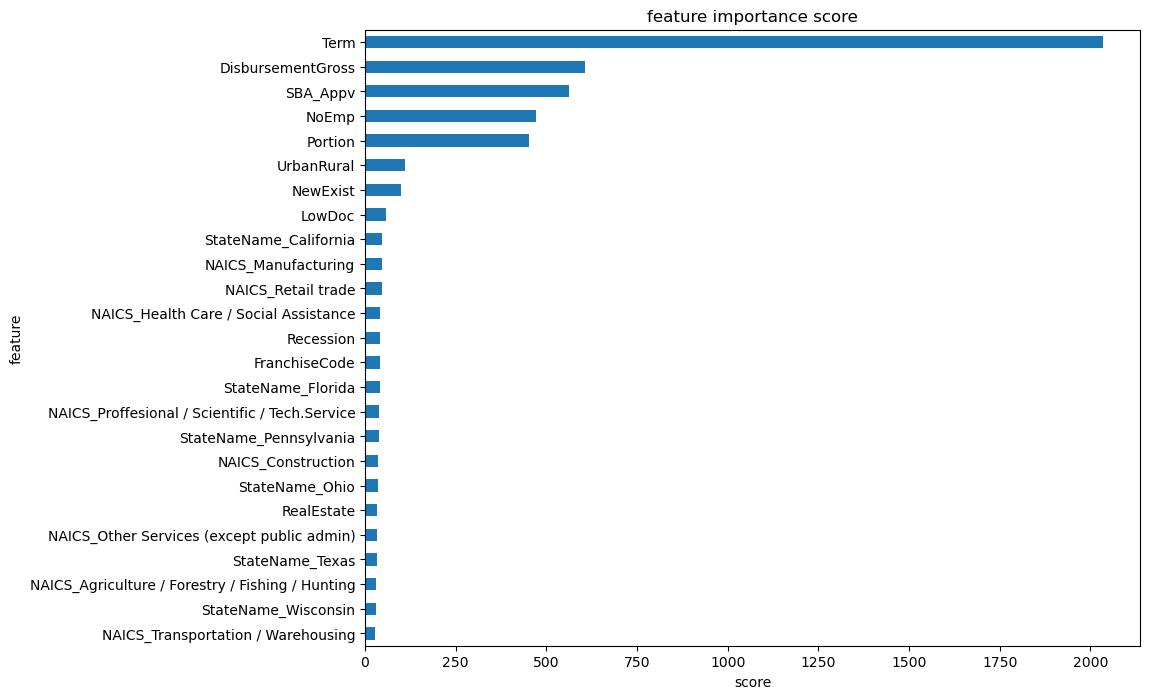

In [15]:
show_feature_importance(grid_search.best_estimator_)

# Desicion Tree

In [37]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.80
Recall (Test Set): 0.80
F1-Score (Test Set): 0.80
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999658029325605
roc_auc (crossval test): 0.9445124010587058


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.88
Recall (Test Set): 0.77
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.999982491946637
roc_auc (crossval test): 0.9214461703068789


param value: 2; train: 0.9942790292909653; test: 0.9676487179686858
param value: 4; train: 0.9847998262297231; test: 0.9666814896677131
param value: 6; train: 0.9796227310494438; test: 0.9649515404095506
param value: 8; train: 0.9755236559671074; test: 0.9627717054868128
param value: 10; train: 0.9727568265166522; test: 0.961602892636477
param value: 12; train: 0.9695577691602917; test: 0.9587576756402956
param value: 14; train: 0.9677973605743511; test: 0.9584043284511111
param value: 16; train: 0.9671647133149642; test: 0.9585685565984977
param value: 18; train: 0.9635942267567226; test: 0.954978897644955
param value: 20; train: 0.9631845884736587; test: 0.9555520301479283
param value: 22; train: 0.963342459620623; test: 0.9560877219954137
param value: 24; train: 0.9618242495893629; test: 0.9546892260497749
param value: 26; train: 0.9594484765704093; test: 0.9525863687456096
param value: 28; train: 0.9598231023859105; test: 0.9533027522777505
param value: 30; train: 0.959764814128702

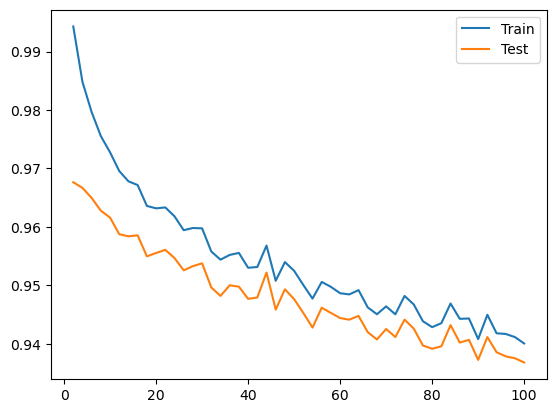

In [30]:

# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 100, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

param value: 1; train: 0.9999919584329533; test: 0.968993383944899
param value: 5; train: 0.9819421038695264; test: 0.966067225403053
param value: 9; train: 0.9745932995518364; test: 0.962802634549517
param value: 13; train: 0.9701306726238064; test: 0.9604163143315226
param value: 17; train: 0.9658840485864745; test: 0.9571068925859569
param value: 21; train: 0.96304902617829; test: 0.9551497055903484
param value: 25; train: 0.9598742075176612; test: 0.952837143303182
param value: 29; train: 0.9585630534510744; test: 0.9525928743202853
param value: 33; train: 0.9590782532920245; test: 0.9532530768088348
param value: 37; train: 0.9544131697695433; test: 0.9483168983018356
param value: 41; train: 0.9557223470746055; test: 0.9504767450820915
param value: 45; train: 0.9503744135876276; test: 0.9449591872582147
param value: 49; train: 0.9521834733059853; test: 0.9472678157088288
param value: 53; train: 0.9512152047086291; test: 0.9465843010761825
param value: 57; train: 0.9496286807607479;

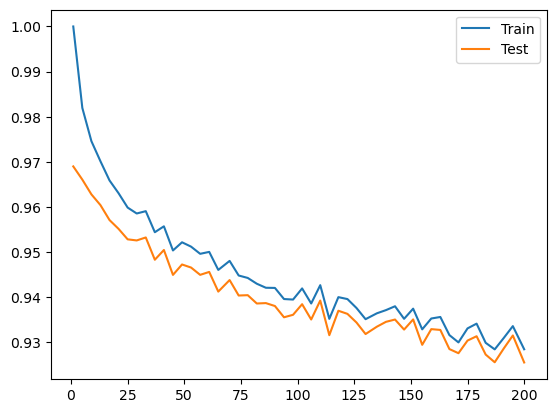

In [31]:
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(1, 200, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [29]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train_over, y_train_over)
eval_classification(rs)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.82
Recall (Test Set): 0.81
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9999818427917114
roc_auc (crossval test): 0.922051815974123


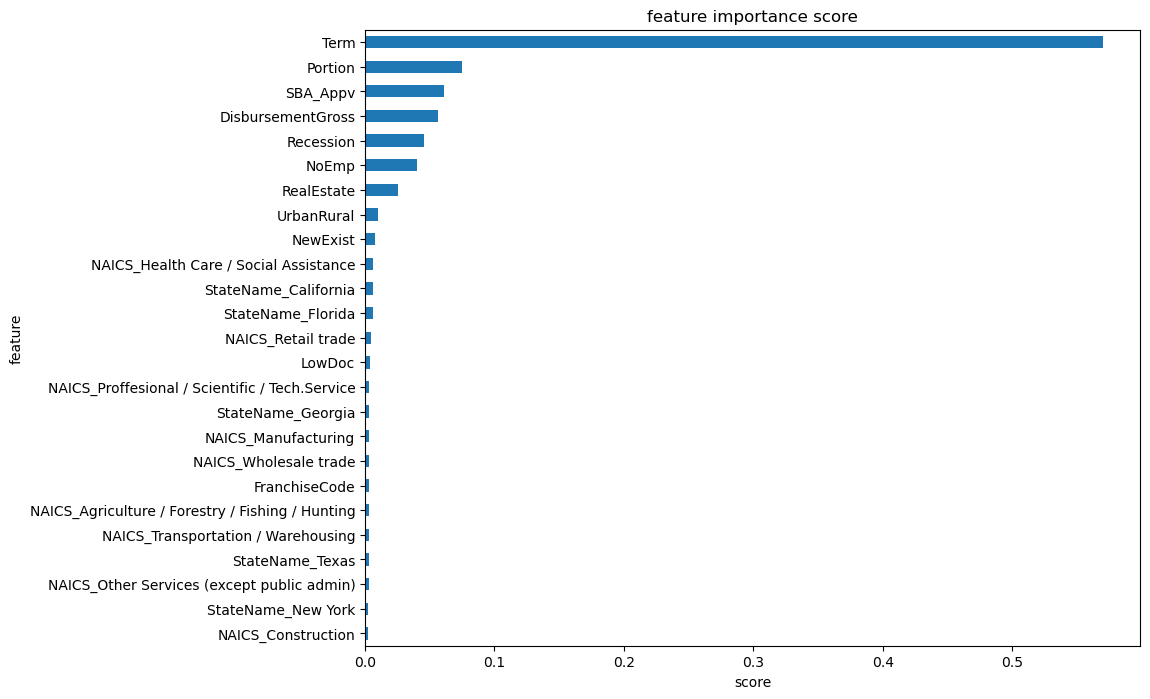

In [31]:
show_feature_importance(rs.best_estimator_)

# XGBOOOST

In [34]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_train_over, y_train_over)
eval_classification(xg)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.86
Recall (Test Set): 0.86
F1-Score (Test Set): 0.86
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9999659000824138
roc_auc (crossval test): 0.9441007991880426


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='f1')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

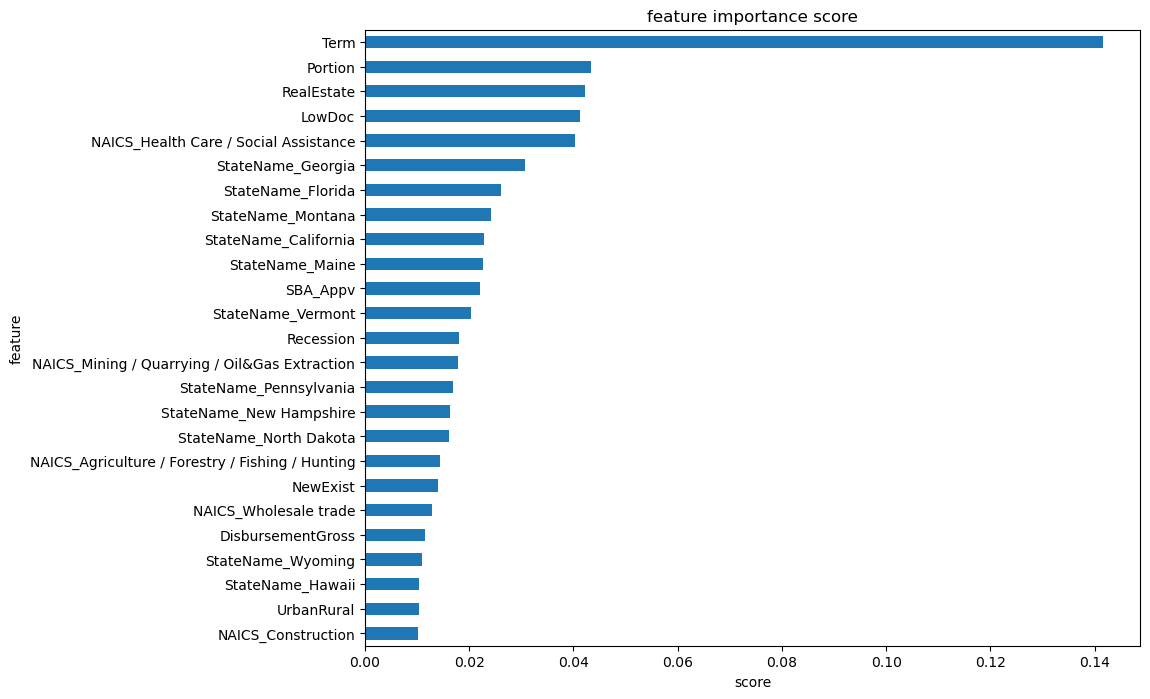

In [36]:
show_feature_importance(xg_tuned.best_estimator_)